In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from speech_modeling import h_input, h_model
import pandas as pd
import os

In [3]:
df = pd.read_csv(os.path.join('data', 'gmu-formants.csv'), low_memory=False)
input_data = h_input(df)
input_data.process('country')
input_data.select_features(selected_features=['F1', 'F2'])
input_data.select_places(places=['uk', 'usa'])
input_data.output_input_df(os.path.join('data', 'uk-us-input_df.csv'))
input_data.normalize(method='z')
input_data.calculate_vif(filename=os.path.join('data', 'uk-us-vif.csv'))
print("Completed")

Completed


In [4]:
model_data = input_data.input_df.copy()
model_features = list(input_data.input_df.columns[4:])
m = h_model(data=model_data, features=model_features, y_feature="location", y_main="uk")
m.fit(model_type="rforest", cv_method="train-test", var_imp_type="mdi")
m.output_importances(os.path.join('data', 'imp-uk-usa-mdi.csv'))


Fitting model of type rforest
Learner 1 Test Accuracy with 30.0% test split: 0.902
Learner 1 Variable Importance Measures:
F2-ask    0.069783
F1-also   0.063661
F2-bob    0.047820
F1-call   0.042208
F2-and    0.042110
F2-blue   0.036507
F1-small  0.030745
F2-bags   0.025648
F2-slabs  0.023091
F1-bob    0.021571

Fitting model of type rforest
Learner 2 Test Accuracy with 30.0% test split: 0.854
Learner 2 Variable Importance Measures:
F2-ask    0.072846
F2-bob    0.059685
F1-also   0.058254
F2-and    0.050245
F1-call   0.042534
F1-bob    0.034692
F2-bags   0.027388
F2-blue   0.025746
F1-small  0.021901
F2-slabs  0.020245

Fitting model of type rforest
Learner 3 Test Accuracy with 30.0% test split: 0.854
Learner 3 Variable Importance Measures:
F2-ask    0.066728
F2-bob    0.060447
F1-call   0.056773
F1-also   0.056683
F2-and    0.054130
F1-bob    0.029150
F2-bags   0.028527
F1-frog   0.025679
F2-snack  0.021391
F2-slabs  0.021363

Fitting model of type rforest
Learner 4 Test Accuracy wit

In [5]:
m.var_imp.head()

,feature,mean,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6
58,F2-ask,0.068254,0.069783,0.075909,0.054493,0.061209,0.066892,0.081240
1,F1-also,0.059254,0.063661,0.052847,0.053541,0.075198,0.059986,0.050293
63,F2-bob,0.056251,0.047820,0.071549,0.061973,0.065792,0.056041,0.034329
11,F1-call,0.055808,0.042208,0.042860,0.085251,0.062078,0.059933,0.042516
57,F2-and,0.048553,0.042110,0.058379,0.061902,0.046371,0.037323,0.045232


In [6]:
m.sample_predict()

Predicted location: not uk


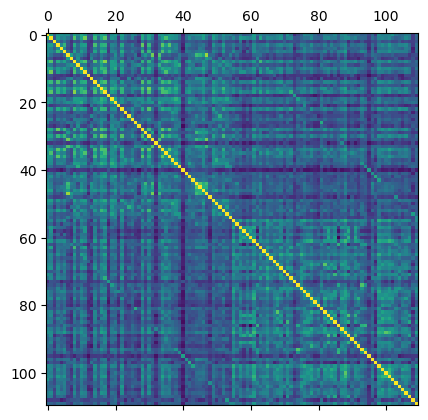

In [7]:
### Pearson Correlation Coefficients Graphed
import matplotlib.pyplot as plt
corr_df = pd.DataFrame(input_data.input_df, columns=model_features).corr()
fig = plt.matshow(corr_df)
plt.savefig(os.path.join("plots", "corr_matrix"))
plt.show()
corr_df.to_csv(os.path.join("data", "corr_df.csv"))